Saving heart_attack_data.csv to heart_attack_data (8).csv
Dataset shape: (1000, 13)
               Age      Gender  FamilyHistory     Smoking      Alcohol  \
count  1000.000000  1000.00000    1000.000000  1000.00000  1000.000000   
mean     55.282000     0.48000       0.497000     0.51000     0.498000   
std      14.309481     0.49985       0.500241     0.50015     0.500246   
min      30.000000     0.00000       0.000000     0.00000     0.000000   
25%      43.000000     0.00000       0.000000     0.00000     0.000000   
50%      55.000000     0.00000       0.000000     1.00000     0.000000   
75%      68.000000     1.00000       1.000000     1.00000     1.000000   
max      79.000000     1.00000       1.000000     1.00000     1.000000   

       PhysicalActivity         Diet          BMI  BloodPressure  Cholesterol  \
count       1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean           0.494000     0.515000    25.008793     119.342350   199.953589   
std   

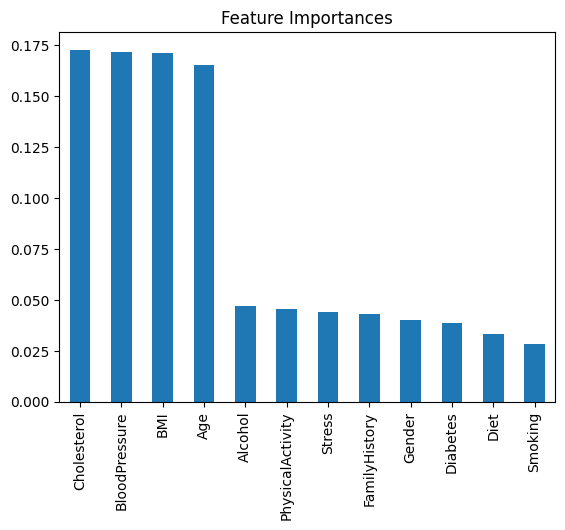

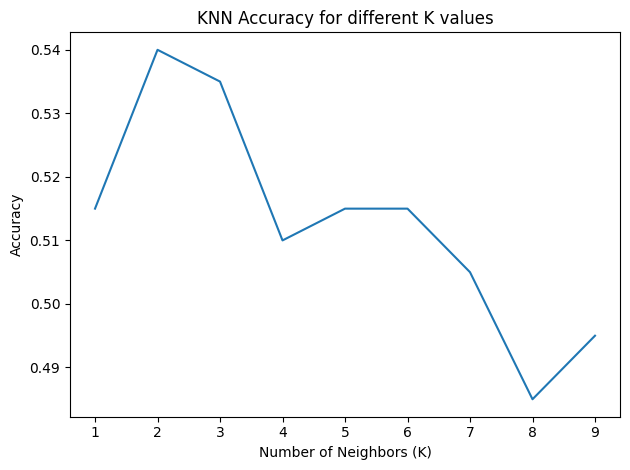

Best K: 2, Accuracy: 0.54

K-Nearest Neighbors - Accuracy: 0.54
K-Nearest Neighbors - Jaccard Score: 0.4619883040935672
K-Nearest Neighbors - Log Loss: 16.580080558993888
              precision    recall  f1-score   support

         0.0       0.53      0.79      0.63       100
         1.0       0.58      0.29      0.39       100

    accuracy                           0.54       200
   macro avg       0.55      0.54      0.51       200
weighted avg       0.55      0.54      0.51       200

Confusion matrix, without normalization
[[29 71]
 [21 79]]


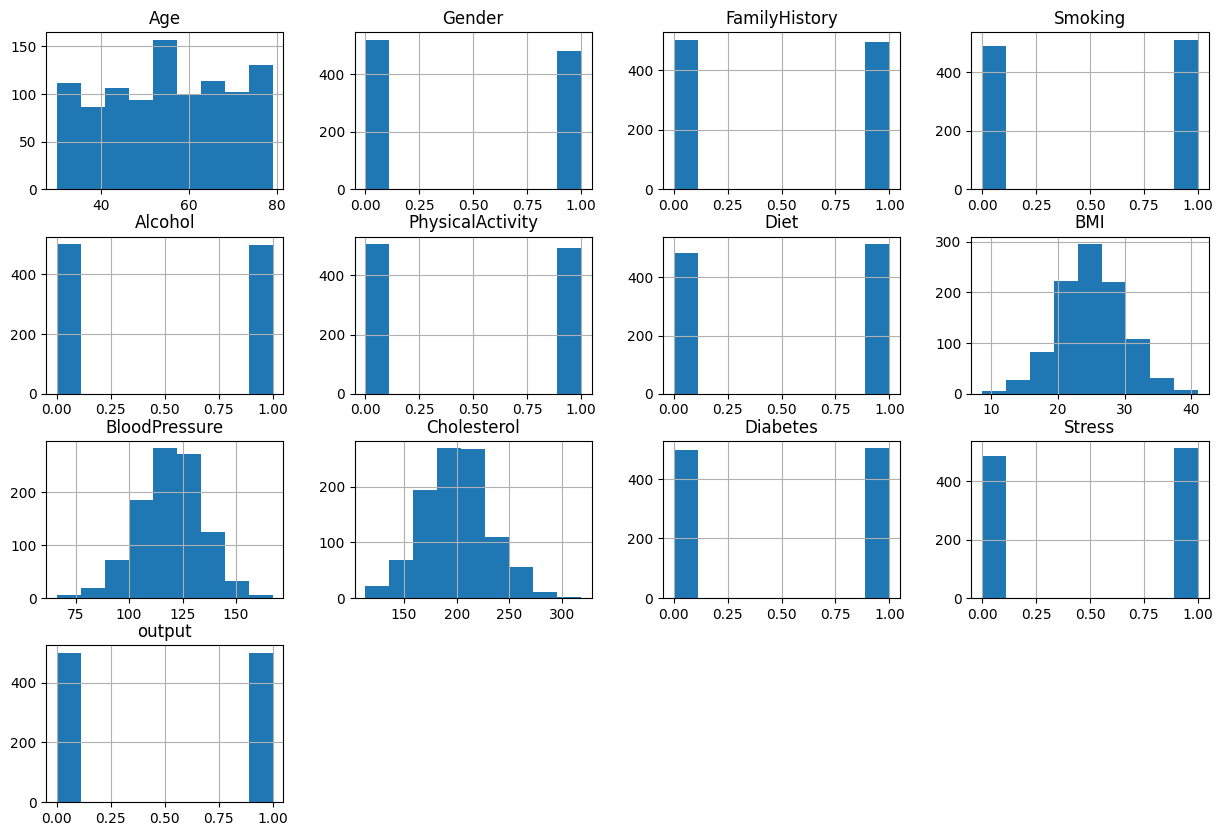

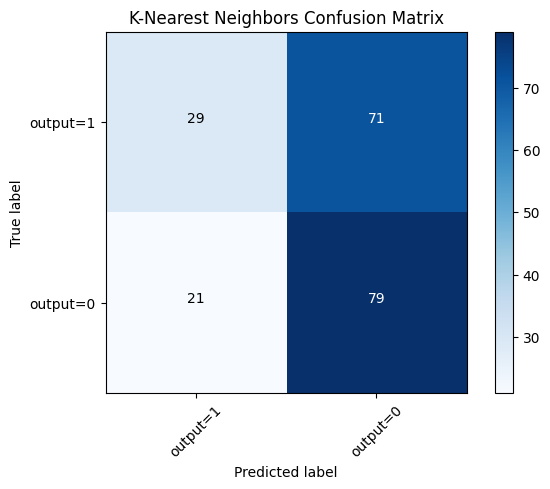


Gradient Boosting - Accuracy: 0.49
Gradient Boosting - Jaccard Score: 0.3333333333333333
Gradient Boosting - Log Loss: 18.382263228449748
              precision    recall  f1-score   support

         0.0       0.49      0.51      0.50       100
         1.0       0.49      0.47      0.48       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion matrix, without normalization
[[47 53]
 [49 51]]


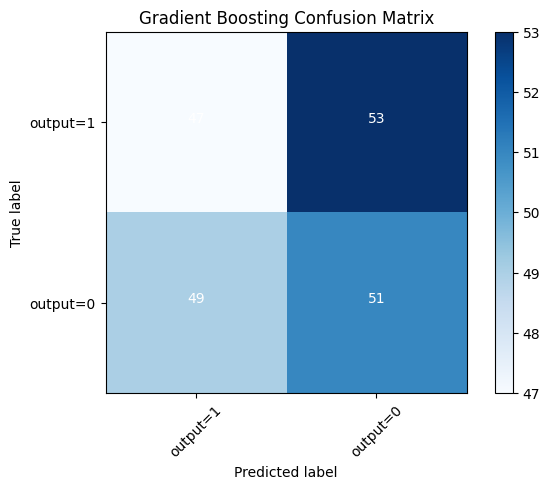


Logistic Regression - Accuracy: 0.54
Logistic Regression - Jaccard Score: 0.3698630136986301
Logistic Regression - Log Loss: 16.580080558993888
              precision    recall  f1-score   support

         0.0       0.54      0.54      0.54       100
         1.0       0.54      0.54      0.54       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200

Confusion matrix, without normalization
[[54 46]
 [46 54]]


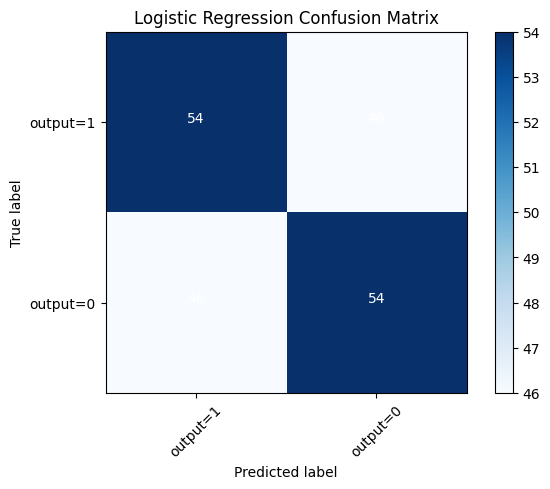


Support Vector Machine - Accuracy: 0.52
Support Vector Machine - Jaccard Score: 0.35570469798657717
Support Vector Machine - Log Loss: 17.30095362677623
              precision    recall  f1-score   support

         0.0       0.52      0.53      0.52       100
         1.0       0.52      0.51      0.52       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Confusion matrix, without normalization
[[51 49]
 [47 53]]


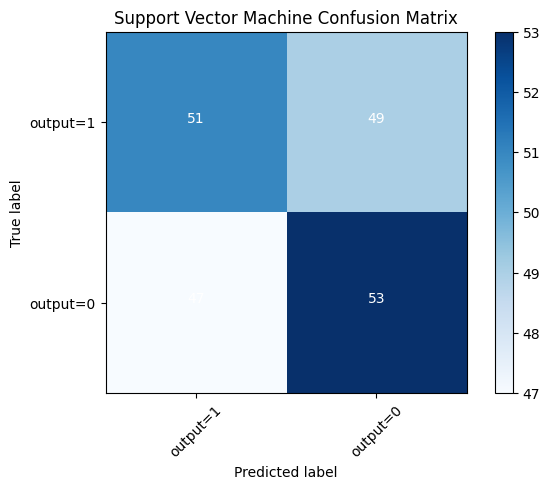


Decision Tree - Accuracy: 0.515
Decision Tree - Jaccard Score: 0.3576158940397351
Decision Tree - Log Loss: 17.481171893721818
              precision    recall  f1-score   support

         0.0       0.51      0.54      0.53       100
         1.0       0.52      0.49      0.50       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200

Confusion matrix, without normalization
[[49 51]
 [46 54]]


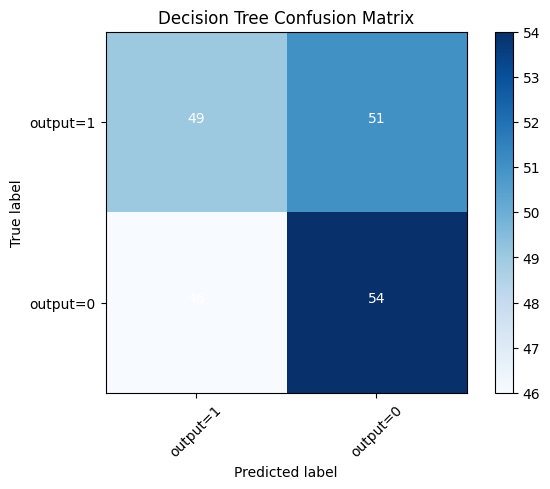


Random Forest - Accuracy: 0.505
Random Forest - Jaccard Score: 0.38125
Random Forest - Log Loss: 17.84160842761299
              precision    recall  f1-score   support

         0.0       0.50      0.61      0.55       100
         1.0       0.51      0.40      0.45       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion matrix, without normalization
[[40 60]
 [39 61]]


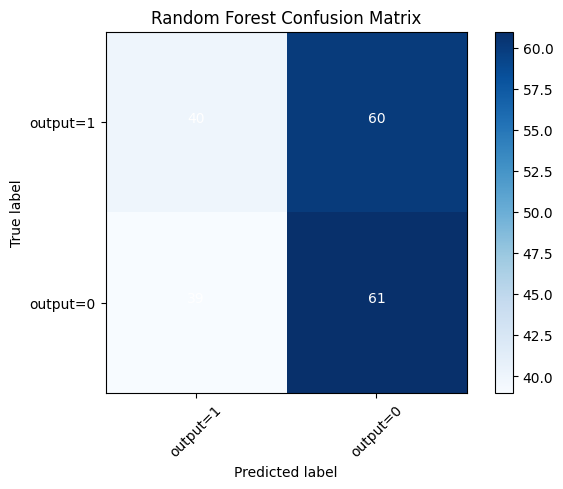

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score, log_loss, classification_report, confusion_matrix
import itertools

# Upload the dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Rename columns for consistency (adjust these names if they differ in your dataset)
df.rename(columns={"caa": "ca", "thalachh": "thalach", "restecg": "rest-ecg", "HeartAttack": "output"}, inplace=True)

# Display basic information
print("Dataset shape:", df.shape)
print(df.describe())
print(df.info())

# Fill missing values in 'ca' if it exists in the dataset
if 'ca' in df.columns:
    df['ca'] = df['ca'].replace(4, np.NaN)
    df['ca'] = df['ca'].fillna(df['ca'].median())

# Drop duplicates
df = df.drop_duplicates()
print("Dataset shape after removing duplicates:", df.shape)

# Separate features (X) and target (y)
X = df.drop(columns=['output'])
y = df['output']

# Feature importance with ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).plot.bar()
plt.title("Feature Importances")
plt.show()

# Scale the feature data
X_scaled = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

# Implement K-Nearest Neighbors with a range of k values
k = 10
accuracy = np.zeros((k-1))

for n in range(1, k):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy[n-1] = metrics.accuracy_score(y_test, y_pred)

# Plot the accuracy for different values of k
plt.plot(range(1, k), accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.title('KNN Accuracy for different K values')
plt.tight_layout()
plt.show()

# Select the best K value
best_k = accuracy.argmax() + 1
print(f"Best K: {best_k}, Accuracy: {accuracy[best_k-1]}")

df.hist(figsize=(15,10), bins=9)

# Confusion Matrix plotting function
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Train and evaluate multiple models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=best_k),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=3),
    "Logistic Regression": LogisticRegression(C=0.01),
    "Support Vector Machine": svm.SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy"),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3, criterion="entropy")
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    print(f"\n{model_name} - Accuracy: {metrics.accuracy_score(y_test, yhat)}")
    print(f"{model_name} - Jaccard Score: {jaccard_score(y_test, yhat, pos_label=0)}")
    print(f"{model_name} - Log Loss: {log_loss(y_test, yhat)}")
    print(classification_report(y_test, yhat))

    # Compute and plot confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['output=1', 'output=0'], title=f'{model_name} Confusion Matrix')
    plt.show()


Saving heart_attack_data.csv to heart_attack_data (4).csv
Dataset Columns: Index(['Age', 'Gender', 'FamilyHistory', 'Smoking', 'Alcohol',
       'PhysicalActivity', 'Diet', 'BMI', 'BloodPressure', 'Cholesterol',
       'Diabetes', 'Stress', 'HeartAttack'],
      dtype='object')


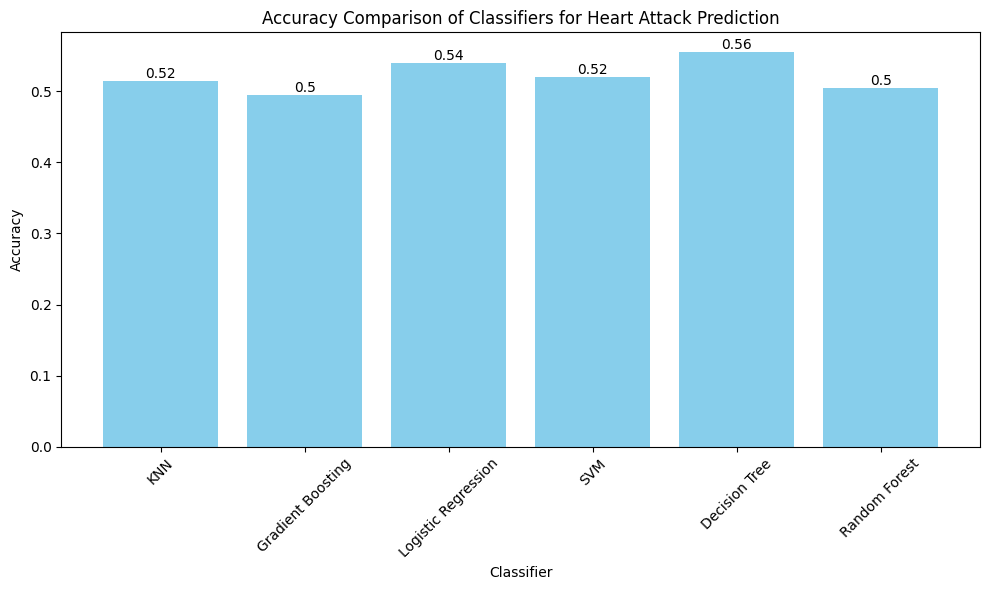

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
from google.colab import files

# Load the dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Display the dataset columns to confirm loading
print("Dataset Columns:", df.columns)

# Rename 'HeartAttack' column to 'output' to be consistent with the target variable name
df.rename(columns={"HeartAttack": "output"}, inplace=True)

# Select features that may be relevant for predicting heart attack risk
# Adjust features based on your data
X = df[['Age', 'Gender', 'FamilyHistory', 'Smoking', 'Alcohol',
        'PhysicalActivity', 'Diet', 'BMI', 'BloodPressure',
        'Cholesterol', 'Diabetes', 'Stress']].values
y = df['output'].values

# Standardize features
X = StandardScaler().fit(X).transform(X.astype(float))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Dictionary to store accuracy results
accuracy_results = {}

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
yhat_knn = knn.predict(X_test)
accuracy_results['KNN'] = accuracy_score(y_test, yhat_knn)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gbc.fit(X_train, y_train)
yhat_gbc = gbc.predict(X_test)
accuracy_results['Gradient Boosting'] = accuracy_score(y_test, yhat_gbc)

# Logistic Regression
log_reg = LogisticRegression(C=0.01)
log_reg.fit(X_train, y_train)
yhat_lr = log_reg.predict(X_test)
accuracy_results['Logistic Regression'] = accuracy_score(y_test, yhat_lr)

# Support Vector Machine (SVM)
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
yhat_svm = svm_model.predict(X_test)
accuracy_results['SVM'] = accuracy_score(y_test, yhat_svm)

# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)
accuracy_results['Decision Tree'] = accuracy_score(y_test, yhat_dt)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, criterion="entropy")
rf.fit(X_train, y_train)
yhat_rf = rf.predict(X_test)
accuracy_results['Random Forest'] = accuracy_score(y_test, yhat_rf)

# Generate the comparison graph
plt.figure(figsize=(10, 6))

# Plot all algorithms
bars = plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')

# Set titles and labels
plt.title('Accuracy Comparison of Classifiers for Heart Attack Prediction')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Annotate accuracy values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the graph
plt.tight_layout()
plt.show()


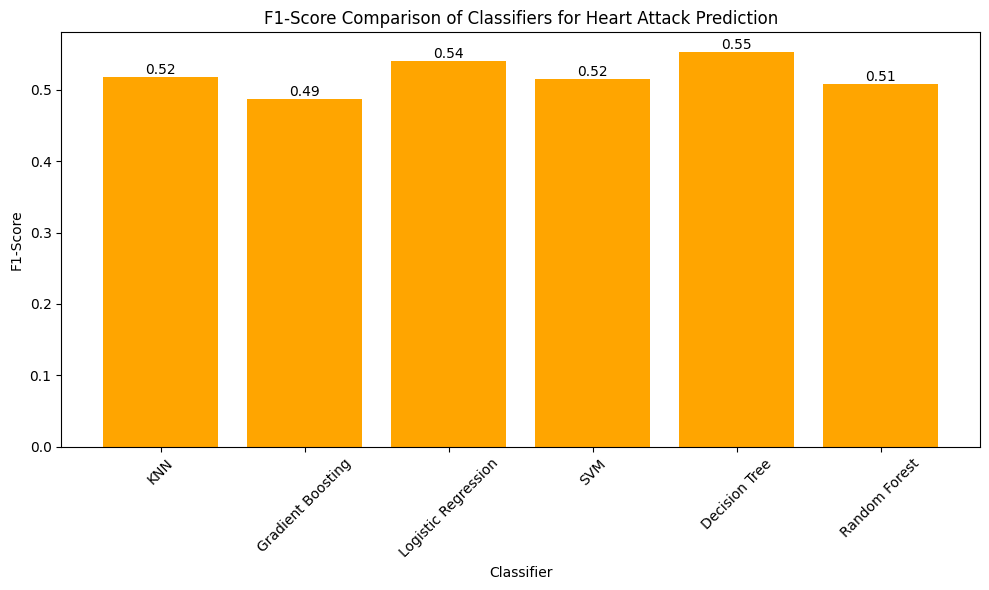

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1-scores for each classifier
f1_scores = {
    'KNN': f1_score(y_test, yhat_knn, average='binary'),
    'Gradient Boosting': f1_score(y_test, yhat_gbc, average='binary'),
    'Logistic Regression': f1_score(y_test, yhat_lr, average='binary'),
    'SVM': f1_score(y_test, yhat_svm, average='binary'),
    'Decision Tree': f1_score(y_test, yhat_dt, average='binary'),
    'Random Forest': f1_score(y_test, yhat_rf, average='binary')
}

# Plot F1-score comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color='orange')

# Set titles and labels
plt.title('F1-Score Comparison of Classifiers for Heart Attack Prediction')
plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)

# Annotate F1 scores on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


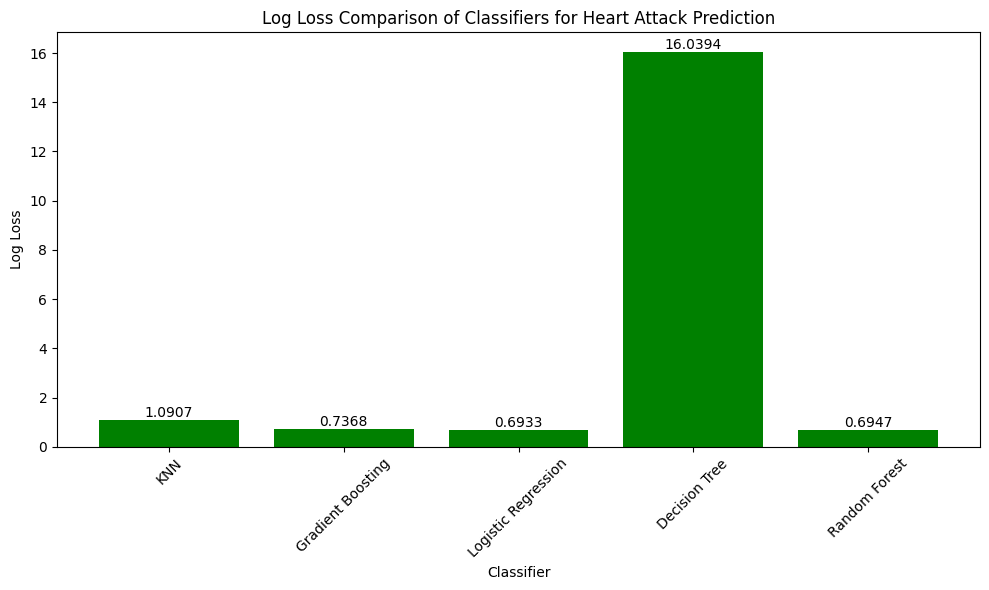

In [ ]:
from sklearn.metrics import log_loss

# Calculate Log Loss for each classifier
log_loss_scores = {
    'KNN': log_loss(y_test, knn.predict_proba(X_test)),
    'Gradient Boosting': log_loss(y_test, gbc.predict_proba(X_test)),
    'Logistic Regression': log_loss(y_test, log_reg.predict_proba(X_test)),
    'Decision Tree': log_loss(y_test, dt.predict_proba(X_test)),
    'Random Forest': log_loss(y_test, rf.predict_proba(X_test))
}

# Plot Log Loss comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(log_loss_scores.keys(), log_loss_scores.values(), color='green')

# Set titles and labels
plt.title('Log Loss Comparison of Classifiers for Heart Attack Prediction')
plt.xlabel('Classifier')
plt.ylabel('Log Loss')
plt.xticks(rotation=45)

# Annotate log loss values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


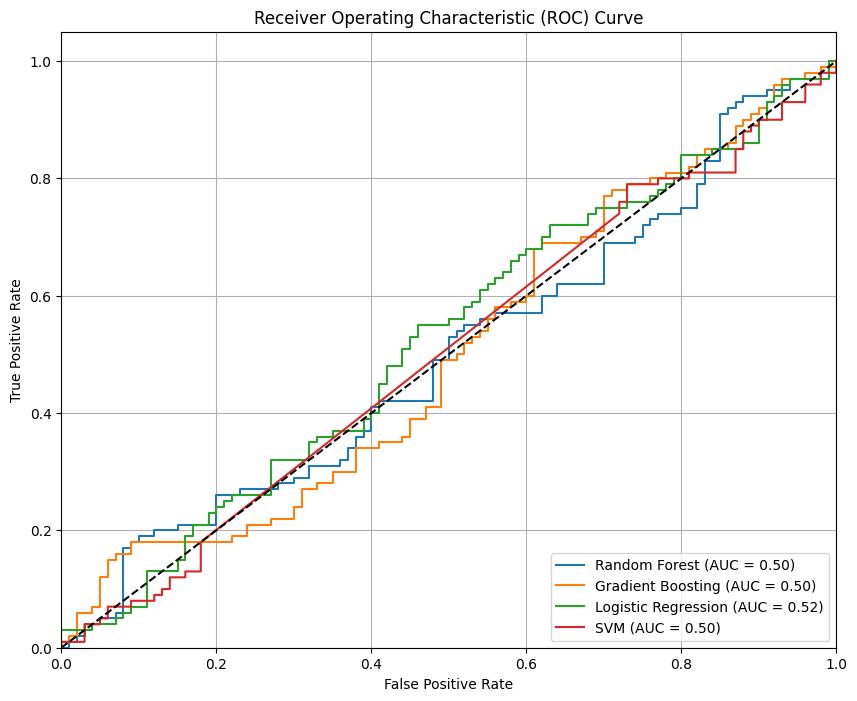

In [ ]:
from sklearn.svm import SVC

# Initialize the SVC model with probability estimates enabled
svm_model = SVC(probability=True)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Import the necessary metrics for ROC curve
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)      # Compute ROC curve
    roc_auc = auc(fpr, tpr)                       # Calculate the AUC
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))

# Plot ROC curves for all classifiers
plot_roc_curve(rf, X_test, y_test, 'Random Forest')
plot_roc_curve(gbc, X_test, y_test, 'Gradient Boosting')
plot_roc_curve(log_reg, X_test, y_test, 'Logistic Regression')
plot_roc_curve(svm_model, X_test, y_test, 'SVM')  # Now includes SVM with probability=True
# Uncomment this line if Decision Tree is also to be plotted
# plot_roc_curve(dt, X_test, y_test, 'Decision Tree')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()  # Add a grid for better readability
plt.show()


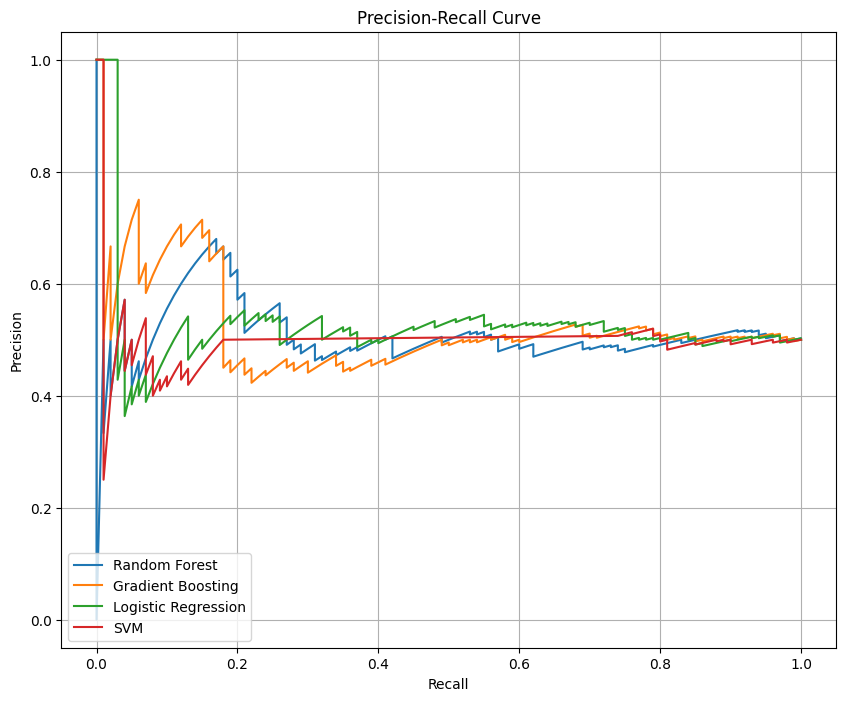

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Function to plot Precision-Recall curve
def plot_pr_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_test, y_prob)  # Calculate precision and recall
    plt.plot(recall, precision, label=f'{label}')  # Plot recall vs precision

# Plotting Precision-Recall curves
plt.figure(figsize=(10, 8))

# Plot Precision-Recall curves for multiple algorithms
plot_pr_curve(rf, X_test, y_test, 'Random Forest')
plot_pr_curve(gbc, X_test, y_test, 'Gradient Boosting')
plot_pr_curve(log_reg, X_test, y_test, 'Logistic Regression')
plot_pr_curve(svm_model, X_test, y_test, 'SVM')  # Now includes SVM with probability=True

# Customize plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()  # Add grid for better readability
plt.show()
